# Dataset: https://www.kaggle.com/datasets/mehradaria/leukemia

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob
from skimage import filters as skifil

In [171]:
def get_img(class_name, type_ = "Original", idx=0):
#     path = os.path.join(type_, class_name)
    file = glob(rf"{type_}/{class_name}/*.jpg")[idx]
    return plt.imread(file)

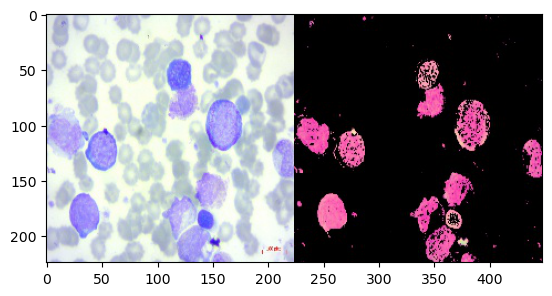

In [172]:
img = get_img("Benign", "Original", idx=1)
mask = get_img("Benign", "Segmented", idx=1)

plt.imshow(np.hstack([img, mask]));

In [ ]:
# Initial steps
- Step1: Median filter
- Step2: Convert to YCRCB
- Step3: Convert to Grayscale

In [214]:
median = skifil.median(img)
print(f"Min: {median.min()} Max: {median.max()}")
y, cr, cb = cv2.cvtColor(median, cv2.COLOR_RGB2YCR_CB)
# gray = cv2.cvtColor(new_img, cv2.COLO)
new_img
plt.imshow(new_img);

Min: 54 Max: 255


ValueError: too many values to unpack (expected 3)

/var/folders/fn/kbxyll_n4yb81n32lyjn3r700000gn/T/ipykernel_21174/313869377.py:6: UserWarning: threshold_multiotsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like that of an RGB image.
  thresholds = threshold_multiotsu(new_img)


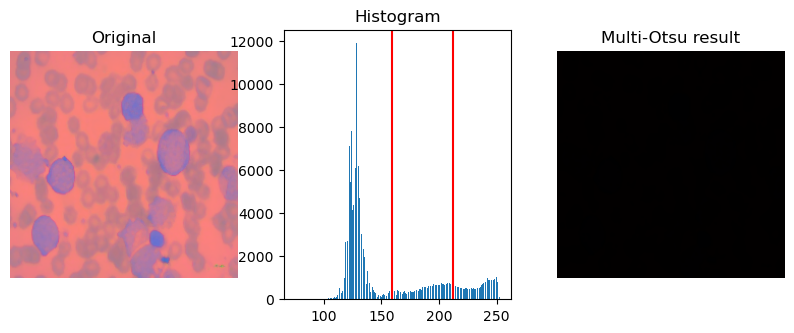

In [182]:
from skimage.filters import threshold_multiotsu

# Applying multi-Otsu threshold for the default value, generating
# three classes.
# gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
thresholds = threshold_multiotsu(new_img)

# Using the threshold values, we generate the three regions.
regions = np.digitize(new_img, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(new_img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(new_img.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()                

(array([   51.,   554., 47833., 45467.,  4456.,  6191., 10285., 12264.,
         9191., 14236.]),
 array([ 74.,  92., 110., 128., 146., 164., 182., 200., 218., 236., 254.]),
 <BarContainer object of 10 artists>)

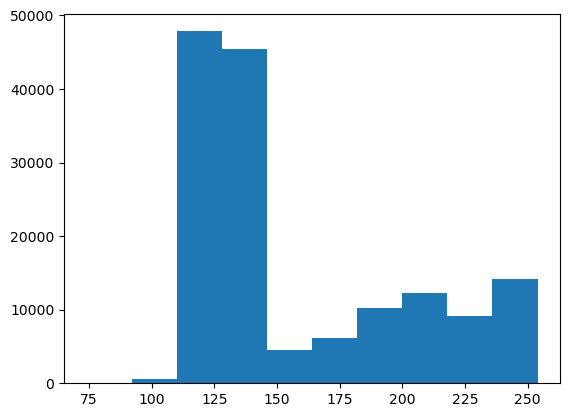

In [202]:
plt.hist(new_img.flatten())

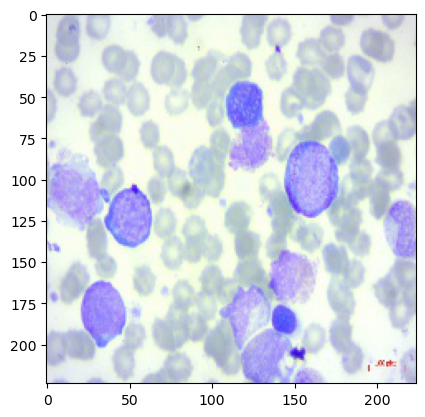

In [203]:
plt.imshow(img)

In [204]:
thresholds

array([159, 212])

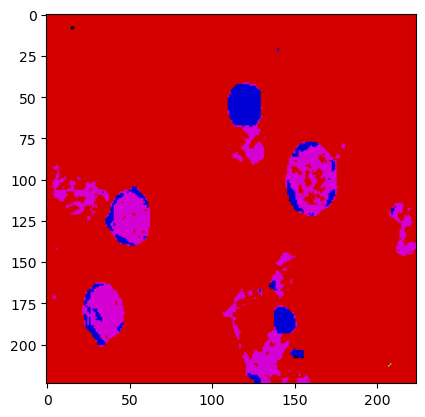

In [205]:
th, im_th = cv2.threshold(new_img, 159, 212, cv2.THRESH_BINARY)
plt.imshow(im_th);